## EDA


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("processed_train.csv")
df


,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,31,63.000000,0,11,7,3,0,1,2018,1,0
1,203,120.700000,0,12,30,4,2,2,2018,3,0
2,41,76.500000,0,7,3,3,1,2,2018,2,0
3,29,139.000000,1,8,8,4,0,1,2018,2,0
4,19,69.000000,2,12,5,4,1,2,2017,2,0
...,...,...,...,...,...,...,...,...,...,...,...
38965,132,74.761524,0,3,11,3,2,1,2018,2,1
38966,280,110.000000,0,9,19,3,2,1,2018,2,1
38967,265,115.000000,1,6,24,4,2,0,2018,2,1
38968,108,145.101279,1,6,9,3,2,0,2018,2,1


In [4]:
df.columns

Index(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'arrival_year',
       'no_of_adults', 'booking_status'],
      dtype='object')

In [5]:
df.shape

(38970, 11)

In [6]:
df.isnull().sum()

lead_time                 0
avg_price_per_room        0
no_of_special_requests    0
arrival_month             0
arrival_date              0
market_segment_type       0
no_of_week_nights         0
no_of_weekend_nights      0
arrival_year              0
no_of_adults              0
booking_status            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(11643)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df["booking_status"].value_counts()

booking_status
0    15050
1    12277
Name: count, dtype: int64

In [10]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [11]:
TARGET = "booking_status"

# Features
X_train = df.drop(columns=[TARGET])
y_train = df[TARGET]


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = model.predict(X_train)


Confusion Matrix:
 [[14998    52]
 [   57 12220]]


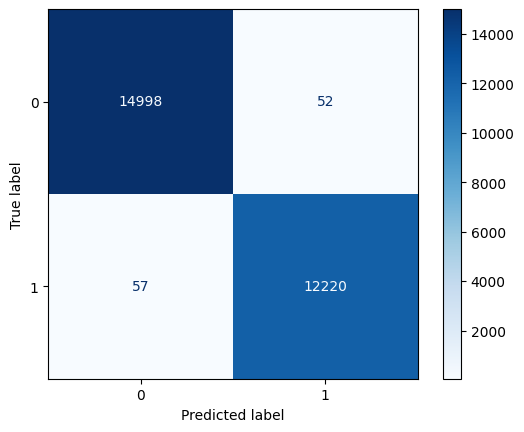

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: nice plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap="Blues")
